In [ ]:
# 한글 지원이 안돼서 나눔폰트 설치
import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonts-nanum* -qq    # 나눔폰트
import matplotlib.font_manager as fm # 아래 위치에 저장됨(나눔고딕으로 저장함)
fe = fm.FontEntry(
    fname = r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', name='NanumBarunGothic')
fm.fontManager.ttflist.insert(0, fe) # fontManager에 ttf 파일 저장
# runtime Configuration
# 글자는 폰트 사이즈별로 폰트 이미지가 있어야함 -> font.family (이걸로 지정)


# plt rc 직접 지정
plt.rcParams.update({'font.size': 18, 'font.family':'NanumBarunGothic'})
plt.rc('figure', figsize =(10,10))
font_option = {'family':'NanumBarunGothic',
               'weight':'bold',
               'size':20}
plt.rc('font', **font_option)

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

### 0307 개인과제 문제

In [ ]:

# 분산을 고려한 마할라노비스 거리를 이용해서 새롭게 입력되는 CRP, PCT를 Viral인지 Bacterial인지 결정하는 프로그램을 작성하시오.

data = {
    'Infection': ['Viral'] * 6 + ['Bacterial'] * 6,
    'CRP (mg/L)': [42, 57, 38, 43, 30, 58, 61, 70, 55, 74, 56, 72],
    'PCT (µg/L)': [33, 29, 39, 40, 45, 39, 67, 60, 62, 75, 55, 70]
}

In [ ]:
# from scipy.spatial.distance import mahalanobis
# from sklearn.covariance import EmpiricalCovariance
# import pandas as pd

# data = {
#     'Infection': ['Viral'] * 6 + ['Bacterial'] * 6,
#     'CRP (mg/L)': [42, 57, 38, 43, 30, 58, 61, 70, 55, 74, 56, 72],
#     'PCT (µg/L)': [33, 29, 39, 40, 45, 39, 67, 60, 62, 75, 55, 70]
#

# df = pd.DataFrame(data, columns = ["Infection", "CRP (mg/L)", "PCT (µg/L)"])
# mean_vector = np.mean(data, axis = 0)

# cov_matrix = np.cov(data, rowvar = False)  # 공분산 행렬
# cov_matrix_inv = np.linalg.inv(cov_matrix)  # 역행렬


# mahalanobis_distances = [mahalanobis(sample, mean_vector, cov_matrix_inv) for sample in data]
# df['Mahalanobis_Distance'] = mahalanobis_distances

# print("\n Mahalanobis Distance:")
# print(df)

In [6]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import mahalanobis
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 생성
data = {
    'Infection': ['Viral'] * 6 + ['Bacterial'] * 6,  # Viral(바이러스성 감염) 과 Bacterial(세균성 감염)
    'CRP (mg/L)': [42, 57, 38, 43, 30, 58, 61, 70, 55, 74, 56, 72],
    'PCT (µg/L)': [33, 29, 39, 40, 45, 39, 67, 60, 62, 75, 55, 70]
}
df = pd.DataFrame(data)

# 각 그룹(Viral, Bacterial)의 평균 및 공분산 행렬 계산
viral_data = df[df['Infection'] == 'Viral'][['CRP (mg/L)', 'PCT (µg/L)']]  # CRP (C-reactive protein, C반응 단백질) / PCT (Procalcitonin, 프로칼시토닌)
bacterial_data = df[df['Infection'] == 'Bacterial'][['CRP (mg/L)', 'PCT (µg/L)']]

viral_mean = viral_data.mean().values
bacterial_mean = bacterial_data.mean().values

print(viral_mean)
print('\n', bacterial_mean)

[44.66666667 37.5       ]

 [64.66666667 64.83333333]


In [7]:
viral_cov_inv = np.linalg.inv(np.cov(viral_data.T))
bacterial_cov_inv = np.linalg.inv(np.cov(bacterial_data.T))

print(viral_cov_inv)
print('\n', bacterial_cov_inv)

[[0.01404428 0.01734623]
 [0.01734623 0.05277246]]

 [[ 0.02764378 -0.02226227]
 [-0.02226227  0.03695186]]


In [8]:
def classify(crp, pct):
    point = np.array([crp, pct])
    dist_viral = mahalanobis(point, viral_mean, viral_cov_inv)
    dist_bacterial = mahalanobis(point, bacterial_mean, bacterial_cov_inv)

    return 'Viral' if dist_viral < dist_bacterial else 'Bacterial'

<Axes: xlabel='CRP (mg/L)', ylabel='PCT (µg/L)'>

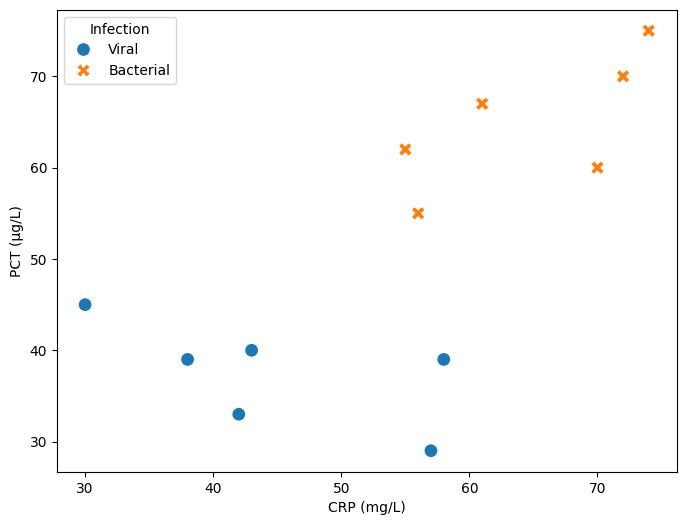

In [9]:
# 새로운 데이터 입력
test_data = [
    (44, 65),
    (65, 65),
    (43, 30),
    (67, 55)
]

# 시각화 해보기
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['CRP (mg/L)'], y=df['PCT (µg/L)'], hue=df['Infection'], style=df['Infection'], s=100)

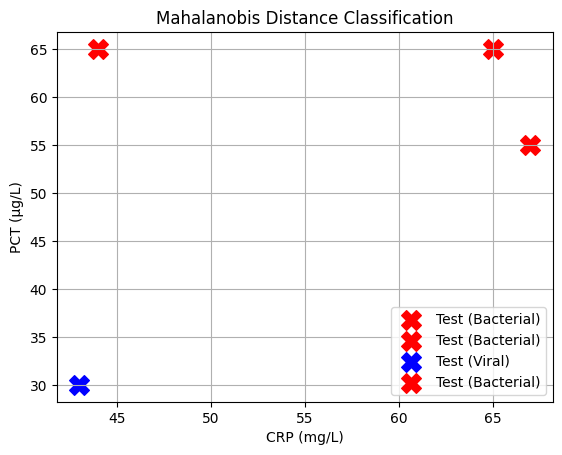

CRP: 44, PCT: 65 -> Infection Type: Bacterial
CRP: 65, PCT: 65 -> Infection Type: Bacterial
CRP: 43, PCT: 30 -> Infection Type: Viral
CRP: 67, PCT: 55 -> Infection Type: Bacterial


In [10]:
# 새로운 테스트 데이터 플롯 가지고 해보기
test_results = []
for crp, pct in test_data:
    result = classify(crp, pct)
    test_results.append((crp, pct, result))
    plt.scatter(crp, pct, color='red' if result == 'Bacterial' else 'blue', marker='X', s=200, label=f'Test ({result})')

plt.xlabel("CRP (mg/L)")
plt.ylabel("PCT (µg/L)")
plt.title("Mahalanobis Distance Classification")
plt.legend()
plt.grid()
plt.show()

# 테스트 결과 출력
for crp, pct, result in test_results:
    print(f"CRP: {crp}, PCT: {pct} -> Infection Type: {result}")